#### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [1]:
import urllib.request, shutil
with urllib.request.urlopen("https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py") as response, open("module_update.py", 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

#### Get essentials

Import text and graph modules for analysis, and css for display

In [2]:
from module_update import update, css

Updated file nbtext.py


In [3]:
css()

# Dewey og Bayes

Her har du selve notebooken som henter ut navn og lager graf.

### Start med å importere modulene

In [4]:
update('graph_networkx_louvain')
import nbtext as nb
import graph_networkx_louvain as gnl
import networkx as nx
from graph_networkx_louvain import cutdown, make_collocation_graph

Updated file graph_networkx_louvain.py


## Bygg korpus og analysér

Hent URN-er fra tekst eller metadata

In [26]:
nb.get_urn({'ddk':"2%", 'year':1960, 'next':50, 'limit':50})

[[2013070938181,
  'Colstrup, Preben',
  'God samvittighet koster bare 30 kroner',
  1994],
 [2011071205541, 'Nordgård, Asbjørn', 'Pris Herren', 2004],
 [2012071308067, '', '"Sannheten skal gjøre dere fri"', 2000],
 [2014081908057, 'Bjørlykke, Oskar Stein', 'Dagene våre', 1992],
 [2013102407064, '', 'Juletid', 1981],
 [2013071608054, 'Carlquist, Jan', 'Hvem skal jeg tro på?', 1976],
 [2009021104037, 'Grønvik, Ottar', 'O̧ndurdís og o̧ndurgoð', 2000],
 [2014052108187, 'Geil, Georg S.', 'Stille i stormen', 1966],
 [2009101904058, '', 'La oss fullføre oppdraget', 1995],
 [2015120408008, '', 'Latinske hymnor og sekvensar', 1988],
 [2008120300169, '', 'Makt, eiendom, rettferdighet', 2000],
 [2008090100132, '', 'Kirken i Salhus', 1999],
 [2013041206083, 'Nordgård, Asbjørn', 'lydhøre Gud', 2003],
 [2010071503012, 'Bowes, Susan', 'Håndbok for hekser', 1999],
 [2008021404085, 'Thelle, Notto R.', 'Hvem kan stoppe vinden?', 1995],
 [2011071405548, '', 'Vigsel', 2004],
 [2014011708133, '', 'Osen ki

In [28]:
korpus = nb.Corpus(ddk='2%', period = (1960, 2010))

In [29]:
korpus.difference(doc_exp=1.1, freq_exp=1.1)

In [30]:
grafer = dict()
missed = []
for u in korpus.target_urn:
    try:
        grafer[u] = nb.make_network_graph(u,list(korpus.difference(doc_exp=1.1, freq_exp=1.1, aslist = False).index)[:200]) 
    except:
        missed.append(nb.metadata(u))

In [31]:
print(len(grafer), len(missed))

100 0


## Analyse

Hent ut mulige navn fra boken

In [32]:
graf = nx.compose_all([grafer[u] for u in grafer])

Clustring slik fargene viser

In [33]:
gnl.show_community(graf)

1 løfte, presten, menighetens, kristen, Herren, Herrens, handler, verdens, Isak, Elias, nød, ære, menighetene, hjerte, kirkene, Israel, synd, sannhet, vårt, menneske, åndelig, bryte, menigheter, prestene, religiøse, alteret, gåver, hellig, Bibelen, Kirken, frihet, gudstjenesten, oppleve, troende, gave, hellige, synden, velsignelse, Satan, Mos, brød, tjener

2 konge, Gal, Guds, makt, møter, evig, fariseerne, Jesaja, kall, Matt, Luther, mennesker, taler, Jesus, vitnesbyrd, frelse, tro, Jerusalem, Jes, budskapet, vokse, straff, profeten, kristne, forkynnelse, lovsang, Messias, virkelighet, Luk, glede, Salme, lidelse, dåp, Pet, disiplene, Vår, Mosebok, oppstandelse, jødene, rike, Rebekka, omvendelse, salme, Jesu, evangeliet, Paulus, Ordet, kjærlighet, profetene, Johannes, disipler, Gud, menigheten

3 døden, synder, gjerninger, rettferdighet, Sønn, nåde, takker, Apg, himmelske, himmelen, Amen, livets, Kristus, troen, håp, evige, Ånd, forkynner, ånd, Sal, synger, Herre, herlighet, tillit, sj

Se litt på hva statistikken viser

In [34]:
dict(nb.central_betweenness_characters(graf, n=10))

{'Bibelen': 0.0009156272448226496,
 'Guds': 0.0009156272448226496,
 'Jesus': 0.0009156272448226496,
 'Gud': 0.0009156272448226496,
 'liv': 0.0009156272448226496,
 'tro': 0.0009156272448226496,
 'kraft': 0.0009156272448226496,
 'makt': 0.0009027929559451685,
 'Paulus': 0.0009023719858665069,
 'budskap': 0.0008956371061093508}

In [35]:
dict(nb.central_characters(graf, n=10))

{'Bibelen': 1.0,
 'Guds': 1.0,
 'Jesus': 1.0,
 'Gud': 1.0,
 'liv': 1.0,
 'tro': 1.0,
 'kraft': 1.0,
 'makt': 0.9949748743718593,
 'Kristus': 0.9949748743718593,
 'budskap': 0.9949748743718593}

Lager en subgraf basert på vekting av buene i grafen

In [47]:
subedge = [(edge[0], edge[1]) for edge in graf.edges(data=True) if edge[2]['weight'] > 10]

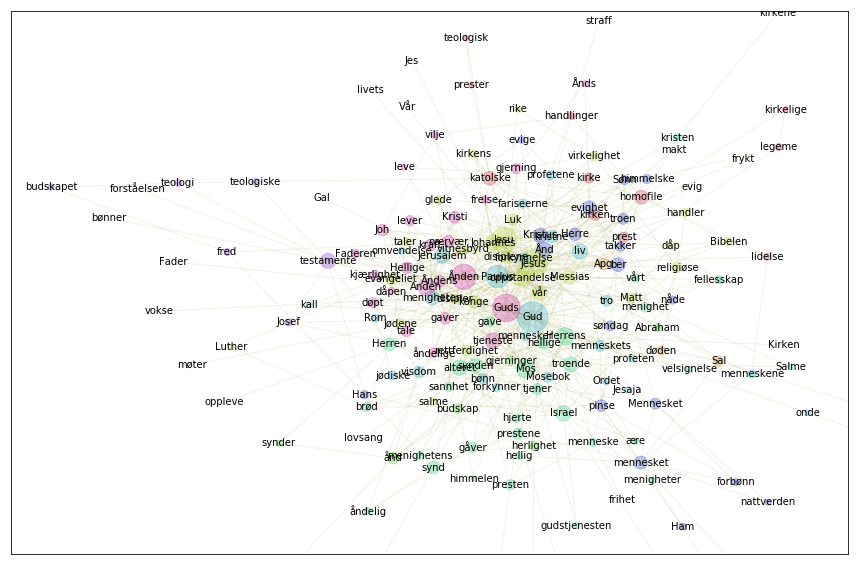

In [48]:
gnl.show_graph(graf.edge_subgraph(subedge))

In [52]:
gnl.show_cliques??

In [51]:
gnl.show_cliques(graf.edge_subgraph(subedge))

(3, 1) konge, prest, dåpen, fariseerne, menighetens, kristen, gjerninger, mennesker, rettferdighet, Apg, frelse, tro, liv, Anden, vilje, Kristi, søndag, visdom, tale, profeten, menighet, troen, katolske, synd, åndelig, ånd, Messias, kirken, Luk, glede, menigheter, Hellige, prestene, dåp, disiplene, gåver, nærvær, Mosebok, Bibelen, Faderen, evangeliet, Rom, hellige, synden, gjerning, kjærlighet, Johannes, kirkens, Mos, Ordet, velsignelse, Gud, brød, Mennesket, Abraham, tjeneste, menneskets, Guds, fellesskap, Jesaja, Herren, menneskene, homofile, Herrens, døpt, Matt, kall, bønn, Jesus, Sønn, takker, vitnesbyrd, Ånden, himmelen, testamente, Jerusalem, Israel, Kristus, Joh, kristne, vårt, forkynnelse, gaver, forkynner, Sal, virkelighet, Herre, alteret, jødiske, oppstandelse, kirke, jødene, budskap, rike, omvendelse, Jesu, kraft, lever, troende, Paulus, gave, åndelige, profetene, disipler, Åndens, vår, tjener, ber, menigheten

(3, 2) Luk, Ånd, evighet, himmelske

(3, 3) mennesket, pinse, na

In [49]:
nb.central_betweenness_characters(graf.edge_subgraph(subedge))

[('Gud', 0.2300420235202736),
 ('Jesus', 0.16467868537664182),
 ('Guds', 0.14073289620137944),
 ('Jesu', 0.11947121097929403),
 ('Ånden', 0.09144042366068383),
 ('Herrens', 0.06270704392748634),
 ('Mos', 0.05684727738804649),
 ('testamente', 0.05150232589632967),
 ('Paulus', 0.046654236986865674),
 ('katolske', 0.033073264627391644)]

In [50]:
nb.central_characters(graf.edge_subgraph(subedge))

[('Gud', 0.3107344632768362),
 ('Jesus', 0.2768361581920904),
 ('Guds', 0.2542372881355932),
 ('Jesu', 0.21468926553672316),
 ('Ånden', 0.20903954802259886),
 ('Paulus', 0.1694915254237288),
 ('Mos', 0.11299435028248588),
 ('Herrens', 0.1016949152542373),
 ('Anden', 0.096045197740113),
 ('Johannes', 0.0847457627118644)]